<a href="https://colab.research.google.com/github/Isam50/SQA_21S21443/blob/main/PModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [24]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/BinaryClass/train'
test_dir = '/content/drive/MyDrive/BinaryClass/test'

In [25]:
import os
print(len(os.listdir('/content/drive/MyDrive/BinaryClass/train/birds')))
print(len(os.listdir('/content/drive/MyDrive/BinaryClass/train/drones')))
print(len(os.listdir('/content/drive/MyDrive/BinaryClass/test/birds')))
print(len(os.listdir('/content/drive/MyDrive/BinaryClass/test/drones')))

165
165
34
34


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (birds vs. drones)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 262 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [27]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.layers import BatchNormalization # import BatchNormalization
from tensorflow.keras.layers import Dropout

# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [28]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [29]:
history = model.fit(train_data, epochs=70, validation_data=validation_data)

Epoch 1/70
9/9 [==============================] - 33s 3s/step - loss: 37.2828 - accuracy: 0.5420 - val_loss: 1.6206 - val_accuracy: 0.5938
Epoch 2/70
9/9 [==============================] - 29s 3s/step - loss: 21.2768 - accuracy: 0.6756 - val_loss: 2.5481 - val_accuracy: 0.5781
Epoch 3/70
9/9 [==============================] - 31s 3s/step - loss: 14.7654 - accuracy: 0.7290 - val_loss: 19.2138 - val_accuracy: 0.5156
Epoch 4/70
9/9 [==============================] - 29s 3s/step - loss: 9.7713 - accuracy: 0.7863 - val_loss: 4.6595 - val_accuracy: 0.5312
Epoch 5/70
9/9 [==============================] - 30s 4s/step - loss: 4.9588 - accuracy: 0.8321 - val_loss: 4.8001 - val_accuracy: 0.6250
Epoch 6/70
9/9 [==============================] - 30s 3s/step - loss: 2.8734 - accuracy: 0.8779 - val_loss: 2.0994 - val_accuracy: 0.6250
Epoch 7/70
9/9 [==============================] - 27s 3s/step - loss: 2.6210 - accuracy: 0.9046 - val_loss: 5.5572 - val_accuracy: 0.5625
Epoch 8/70
9/9 [==============

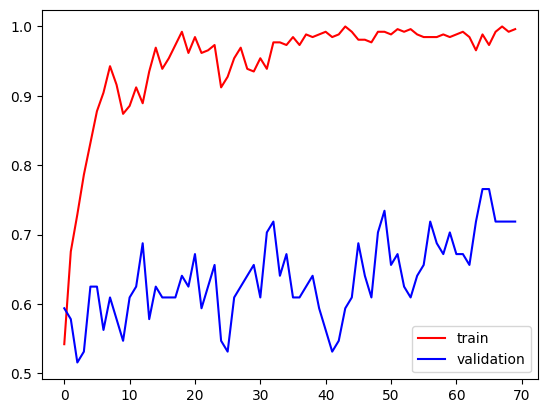

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


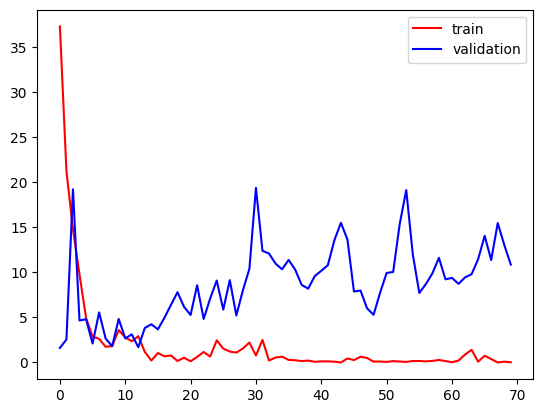

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 66 images belonging to 2 classes.


In [34]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

3/3 [==============================] - 10s 4s/step
[[1.0000000e+00]
 [0.0000000e+00]
 [2.9928702e-31]
 [1.0840066e-18]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [5.5618654e-10]
 [6.1073457e-26]
 [1.0000000e+00]
 [8.3371691e-15]
 [1.0000000e+00]
 [5.7766195e-11]
 [1.1888442e-22]
 [0.0000000e+00]
 [1.0000000e+00]
 [8.4435514e-24]
 [1.0000000e+00]
 [6.1231009e-38]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [8.7698530e-26]
 [9.9999994e-01]
 [1.3374591e-11]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9733144e-01]
 [0.0000000e+00]
 [1.0000000e+00]
 [3.3488231e-18]
 [0.0000000e+00]
 [0.0000000e+00]
 [9.7606247e-19]
 [6.8459565e-34]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.5027787e-12]
 [9.9154849e-23]
 [9.9999851e-01]
 [0.0000000e+00]
 [4.7392668e-28]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [2.9771071e-26]
 [2.2713763e-28]
 [1.0000000e+00]
 [1.0000000e+0

In [35]:
len(predictions)

66

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[18 15]
 [21 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        33
           1       0.44      0.36      0.40        33

    accuracy                           0.45        66
   macro avg       0.45      0.45      0.45        66
weighted avg       0.45      0.45      0.45        66

